In [96]:
import numpy as np
import pandas as pd
import cobra.test
import os

from os.path import join

from time import time


from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

import cobra
from cobra.test import create_test_model
cobra_config = cobra.Configuration()
cobra_config.solver = "gurobi"
model = create_test_model("textbook")
model.solver

a = cobra.io.read_sbml_model("iEC1344_C.xml")


In [130]:
import SBMLDiagrams as sd
from SBMLDiagrams import *

df = SBMLDiagrams.load("iEC1344_C.xml")


In [106]:
for i in df.getReactionIdList():
    print(i)

R_EX_cm_e
R_EX_cmp_e
R_EX_co2_e
R_EX_cobalt2_e
R_EX_colipa_e
R_EX_colipap_e
R_EX_cpgn_e
R_EX_cpgn_un_e
R_EX_crn_e
R_EX_crn__D_e
R_EX_csn_e
R_EX_glc__D_e
R_EX_glcn_e
R_EX_cu_e
R_EX_glcr_e
R_DM_4crsol_c
R_EX_glcur_e
R_EX_glcur1p_e
R_EX_cu2_e
R_EX_gln__L_e
R_EX_glu__L_e
R_DM_5drib_c
R_EX_cyan_e
R_DM_aacald_c
R_DM_amob_c
R_DM_mththf_c
R_DM_oxam_c
R_EX_gly_e
R_EX_glyald_e
R_EX_glyb_e
R_EX_glyc_e
R_EX_glyc__R_e
R_EX_glyc2p_e
R_EX_glyc3p_e
R_EX_glyclt_e
R_EX_gmp_e
R_EX_gsn_e
R_EX_gthox_e
R_EX_gthrd_e
R_EX_gtp_e
R_EX_gua_e
R_EX_h_e
R_EX_h2_e
R_EX_h2o_e
R_BIOMASS_Ec_iJO1366_WT_53p95M
R_BIOMASS_Ec_iJO1366_core_53p95M
R_EX_12ppd__R_e
R_EX_12ppd__S_e
R_EX_14glucan_e
R_EX_15dap_e
R_EX_23camp_e
R_EX_23ccmp_e
R_EX_23cgmp_e
R_EX_23cump_e
R_EX_23dappa_e
R_EX_26dap__M_e
R_EX_2ddglcn_e
R_EX_h2o2_e
R_EX_h2s_e
R_EX_hacolipa_e
R_EX_halipa_e
R_EX_hdca_e
R_EX_34dhpac_e
R_EX_3amp_e
R_EX_hdcea_e
R_EX_3cmp_e
R_EX_cynt_e
R_EX_3gmp_e
R_EX_3hcinnm_e
R_EX_3hpp_e
R_EX_3hpppn_e
R_EX_3ump_e
R_EX_4abut_e
R_EX_hg2_e
R_EX

In [144]:
glu_vs_lac = pd.read_csv('FINAL different reactions glu vs lac 4 decimals.csv')
glu_vs_lac.iloc[:,2]
glu_vs_lac_reactions= list(glu_vs_lac.iloc[:,2])
glu_vs_lac_reactions

glu_vs_lac_reactions = ["R_" + i for i in glu_vs_lac_reactions]   

print(glu_vs_lac_reactions)

['R_LCTStex', 'R_3HAD40', 'R_3HAD60', 'R_3HAD80', 'R_3OAR40', 'R_3OAR60', 'R_3OAR80', 'R_3OAS60', 'R_3OAS80', 'R_ACGAptspp', 'R_ACHBS', 'R_ACMANAptspp', 'R_ACOAD1f', 'R_ACOAD2f', 'R_ACOAD3f', 'R_ADMDC', 'R_ADNt2pp', 'R_AGMtex', 'R_ALAALAtex', 'R_ANPRT', 'R_ANS', 'R_ARGtex', 'R_ATPPRT', 'R_CADVtpp', 'R_CGLYtex', 'R_CHORM', 'R_CHORS', 'R_CPPPGO', 'R_CYTDt2pp', 'R_DADNt2pp', 'R_DAPDC', 'R_DAPE', 'R_DAPabcpp', 'R_DAPtex', 'R_DCYTt2pp', 'R_DDPA', 'R_DGSNt2pp', 'R_DHAD2', 'R_DHBD', 'R_DHDPRy', 'R_DHDPS', 'R_DHQS', 'R_DHQTi', 'R_DINSt2pp', 'R_DURIt2pp', 'R_ECOAH1', 'R_ECOAH2', 'R_ECOAH3', 'R_EX_15dap_e', 'R_EX_his__L_e', 'R_EX_ile__L_e', 'R_EX_leu__L_e', 'R_EX_phe__L_e', 'R_EX_spmd_e', 'R_EX_tyr__L_e', 'R_F6Pt6_2pp', 'R_FACOAL80t2pp', 'R_G1PPpp', 'R_G3PEtex', 'R_G3PGtex', 'R_G6Pt6_2pp', 'R_GAL1PPpp', 'R_GALKr', 'R_GALM2pp', 'R_GALtex', 'R_GAM6Pt6_2pp', 'R_GAMptspp', 'R_GSNt2pp', 'R_HISTD', 'R_HISTP', 'R_HIStex', 'R_HSTPT', 'R_HXAtex', 'R_ICHORT', 'R_IG3PS', 'R_IGPDH', 'R_IGPS', 'R_ILETA', 'R_

In [31]:
for i in a.reactions:
    print(i.id)

EX_cm_e
EX_cmp_e
EX_co2_e
EX_cobalt2_e
EX_colipa_e
EX_colipap_e
EX_cpgn_e
EX_cpgn_un_e
EX_crn_e
EX_crn__D_e
EX_csn_e
EX_glc__D_e
EX_glcn_e
EX_cu_e
EX_glcr_e
DM_4crsol_c
EX_glcur_e
EX_glcur1p_e
EX_cu2_e
EX_gln__L_e
EX_glu__L_e
DM_5drib_c
EX_cyan_e
DM_aacald_c
DM_amob_c
DM_mththf_c
DM_oxam_c
EX_gly_e
EX_glyald_e
EX_glyb_e
EX_glyc_e
EX_glyc__R_e
EX_glyc2p_e
EX_glyc3p_e
EX_glyclt_e
EX_gmp_e
EX_gsn_e
EX_gthox_e
EX_gthrd_e
EX_gtp_e
EX_gua_e
EX_h_e
EX_h2_e
EX_h2o_e
BIOMASS_Ec_iJO1366_WT_53p95M
BIOMASS_Ec_iJO1366_core_53p95M
EX_12ppd__R_e
EX_12ppd__S_e
EX_14glucan_e
EX_15dap_e
EX_23camp_e
EX_23ccmp_e
EX_23cgmp_e
EX_23cump_e
EX_23dappa_e
EX_26dap__M_e
EX_2ddglcn_e
EX_h2o2_e
EX_h2s_e
EX_hacolipa_e
EX_halipa_e
EX_hdca_e
EX_34dhpac_e
EX_3amp_e
EX_hdcea_e
EX_3cmp_e
EX_cynt_e
EX_3gmp_e
EX_3hcinnm_e
EX_3hpp_e
EX_3hpppn_e
EX_3ump_e
EX_4abut_e
EX_hg2_e
EX_his__L_e
EX_hom__L_e
EX_hxa_e
EX_hxan_e
EX_4hoxpacd_e
EX_5dglcn_e
EX_5mtr_e
EX_LalaDglu_e
EX_cys__D_e
EX_LalaDgluMdap_e
EX_cys__L_e
EX_LalaDgluMdapDa

In [28]:
for i in a.metabolites:
    print(i.name)

Glycine
Nicotinamide adenine dinucleotide phosphate
Phosphatidylethanolamine (dioctadec-11-enoyl, n-C18:1)
Nickel
10-Formyltetrahydrofolate
Phosphate
Molybdopterin guanine dinucleotide
Phosphatidylglycerol (dihexadecanoyl, n-C16:0)
5,10-Methylenetetrahydrofolate
L-Serine
Cardiolipin (tetrahexadecanoyl, n-C16:0)
Riboflavin C17H20N4O6
Phosphatidylethanolamine (dihexadec-9enoyl, n-C16:1)
Phosphatidylethanolamine (dihexadecanoyl, n-C16:0)
Spermidine
Lipoate (protein bound)
Phosphatidylglycerol (dihexadec-9-enoyl, n-C16:1)
L-Glutamate
L-Histidine
CTP C9H12N3O14P3
ADP C10H12N5O10P2
2-Demethylmenaquinol 8
L-Cysteine
P-Cresol
Co2+
DATP C10H12N5O12P3
Phosphatidylglycerol (dihexadec-9-enoyl, n-C16:1)
5'-deoxyribose
L-Tyrosine
Aminoacetaldehyde
Nicotinamide adenine dinucleotide
Reduced glutathione
S-Adenosyl-4-methylthio-2-oxobutanoate
Acetyl-CoA
Heme O C49H56FeN4O5
Phosphatidylglycerol (dihexadecanoyl, n-C16:0)
(2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran
Chloride
Menaquinol 8
H+
Zinc
Ox

In [145]:
glu_vs_lac_reactions

for i in glu_vs_lac_reactions:
    print(i)
    df.setReactionFillColor(str(i), "BurlyWood")


R_LCTStex
R_3HAD40
R_3HAD60
R_3HAD80
R_3OAR40
R_3OAR60
R_3OAR80
R_3OAS60
R_3OAS80
R_ACGAptspp
R_ACHBS
R_ACMANAptspp
R_ACOAD1f
R_ACOAD2f
R_ACOAD3f
R_ADMDC
R_ADNt2pp
R_AGMtex
R_ALAALAtex
R_ANPRT
R_ANS
R_ARGtex
R_ATPPRT
R_CADVtpp
R_CGLYtex
R_CHORM
R_CHORS
R_CPPPGO
R_CYTDt2pp
R_DADNt2pp
R_DAPDC
R_DAPE
R_DAPabcpp
R_DAPtex
R_DCYTt2pp
R_DDPA
R_DGSNt2pp
R_DHAD2
R_DHBD
R_DHDPRy
R_DHDPS
R_DHQS
R_DHQTi
R_DINSt2pp
R_DURIt2pp
R_ECOAH1
R_ECOAH2
R_ECOAH3
R_EX_15dap_e
R_EX_his__L_e
R_EX_ile__L_e
R_EX_leu__L_e
R_EX_phe__L_e
R_EX_spmd_e
R_EX_tyr__L_e
R_F6Pt6_2pp
R_FACOAL80t2pp
R_G1PPpp
R_G3PEtex
R_G3PGtex
R_G6Pt6_2pp
R_GAL1PPpp
R_GALKr
R_GALM2pp
R_GALtex
R_GAM6Pt6_2pp
R_GAMptspp
R_GSNt2pp
R_HISTD
R_HISTP
R_HIStex
R_HSTPT
R_HXAtex
R_ICHORT
R_IG3PS
R_IGPDH
R_IGPS
R_ILETA
R_ILEtex
R_INDOLEtex
R_INSt2pp
R_IPMD
R_IPPMIa
R_IPPMIb
R_IPPS
R_KARA2
R_LACZpp
R_LALADGLUtpp
R_LALALGLUtpp
R_LEUTAi
R_LEUtex
R_LYSDC
R_LYStex
R_MAN6Pt6_2pp
R_MANptspp
R_MCTP2App
R_MDDCP2pp
R_MDDEP4pp
R_MDRPD
R_METAT
R_METSOX1abcpp
R_METS

In [147]:
i= "LCTStex"
df.getReactionFillColor("R_LCTStex")

[[222, 184, 135, 255], 'burlywood', '#DEB887FF']

In [134]:
df.setReactionFillColor("R_LCTStex", "BurlyWood")

In [132]:
df.setReactionFillColor("R_EX_cu2_e", "BurlyWood")

In [133]:
df.getReactionFillColor("R_EX_cu2_e")

[[222, 184, 135, 255], 'burlywood', '#DEB887FF']

In [91]:
df.setReactionBezierHandles("R_EX_cu2_e", [[550,150],[530,155],[600,120]])

In [92]:
df.setReactionLineThickness ("R_EX_cu2_e", 3.)

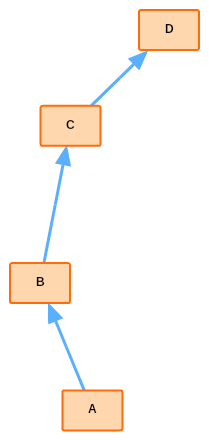

In [119]:
import SBMLDiagrams
import tellurium as te

r = te.loada ('''
A -> B; v;
B -> C; v;
C -> D; v;
v = 0
''')

df = SBMLDiagrams.load(r.getSBML())
df.autolayout()
df.draw()


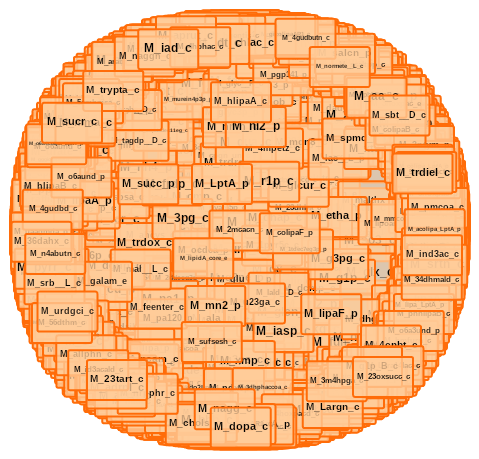

In [150]:
import SBMLDiagrams
import tellurium as te


df = SBMLDiagrams.load("iEC1344_C.xml")
df.autolayout()
df.draw()
